## First Example
### Plotting FFT Using *fft.py*

#### Goal of *fft.py*
The main goal of *fft.py* is to have a simple FFT plot reflecting the frequency domain signal strengths in the same unit of the time domain signal strengths by
- Taking the fft, amplitude, and only the non-negative frequencies
- Scaling the fft so that the units match

#### DFT Formula
Discrete Fourier Transform (DFT) Formula: $\Large{X_{k}=\sum_{n=0}^{N-1} x_{n}e^{\frac{-j2\pi kn}{N}}}$
- $X_{k}$ is the DFT coefficients,
- $x_{n}$ is the signal samples, 
- $k$ is the frequency index, 
- $n$ is the signal index, 
- $N$ is the number of signal samples.

#### A Pure Sine Wave
When $x$ is a pure sine wave with frequency $f$ Hz and amplitude $\alpha$,
- We have something like: $x_{n}=\alpha\cos{(2\pi fn)}$ (phase ignored)
- From Euler's formula: $\Large{x_{n}=\alpha\frac{e^{j2\pi fn}+e^{-j2\pi fn}}{2}}$

#### DFT of Pure Sine Wave
Plug the pure sine wave into the DFT formula:
- $\Large{X_{k}=\sum_{n=0}^{N-1} x_{n}e^{\frac{-j2\pi kn}{N}}}$
- $\Large{X_{k}=\sum_{n=0}^{N-1} \alpha\frac{e^{j2\pi fn}+e^{-j2\pi fn}}{2}e^{\frac{-j2\pi kn}{N}}}$
- $\Large{X_{k}=\frac{\alpha}{2}\sum_{n=0}^{N-1} (e^{j2\pi n (f-\frac{k}{N})}+e^{-j2\pi n(f+\frac{k}{N})})}$

#### Corresponding FFT Index
Most terms round up to $0$ except:
- When $f=\frac{k}{N}$ or $k=fN$
- Then, $X_{k}=\frac{\alpha N}{2}$ or $\alpha=\frac{2X_{k}}{N}$

#### Scaling
- This part is only true for real signals!
- Since we have $\alpha=\frac{2X_{k}}{N}$, we need to scale $X_{k}$ with $\frac{2}{N}$ to match $\alpha$
- For $f=0$ we have constant signal $x_{n}=\alpha$
- The zero index for constant signal: $\Large{X_{0}=\sum_{n=0}^{N-1} \alpha e^{\frac{-j2\pi 0n}{N}}}$
- $X_{0}=N\alpha$ or $\alpha=\frac{X_{0}}{N}$
- So, we need to scale $X_{0}$ with $\frac{1}{N}$ to match $\alpha$

#### Code Explanation
In the following line
```
fft = (abs(2 * np.fft.fft(signal) / len(signal)))[:int(len(signal) / 2)]
```
The right handside
```
[:int(len(signal) / 2)]
```
is for ignoring the left side of the FFT plot and
```
fft = 2 * np.fft.fft(signal) / len(signal)
```
is for getting $\alpha=\frac{2X_{k}}{N}$
```
fft[0] /= 2
```
is to get rid of the extra $2$ for zero frequency.

Next example: [/examples/freq_domain/fft_index_freq_match.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/freq_domain/fft_index_freq_match.ipynb)

In [1]:
import sys
sys.path.insert(0, '../../') # To be able to reach functions
from functions import fft

In [2]:
first_time = 0 # s
last_time = 3 # s
samp_freq = 100 # Hz

time = fft.get_time(first_time, last_time, samp_freq) # s

frequency = 8 # Hz
amplitude = 2
phase = 0.6 # rad
offset = 3

signal = fft.get_signal(frequency, amplitude, phase, offset, time)

print(len(time), len(signal), len(fft.take_fft(signal)))

301 301 150


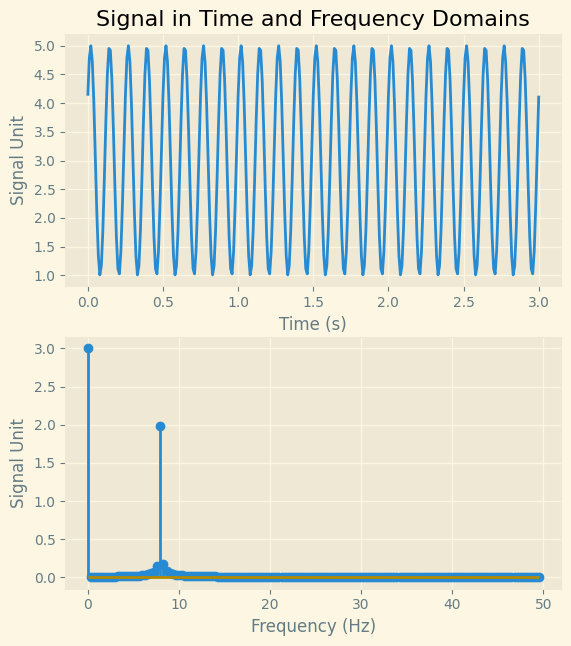

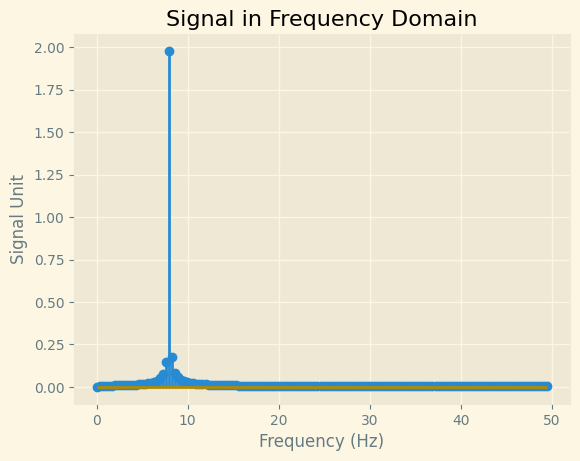

In [3]:
fft.plot_signal_and_fft(time, signal, samp_freq)
fft.plot_fft(fft.remove_offset(signal), samp_freq)
# fft.plot_signal(time, signal) # Also possible

Next example: [/examples/freq_domain/fft_index_freq_match.ipynb](https://github.com/serhatsoyer/py4DSP/blob/main/examples/freq_domain/fft_index_freq_match.ipynb)